In [1]:
ls data

 Volume in drive C has no label.
 Volume Serial Number is C49D-2525

 Directory of C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data

07/10/2020  08:10 PM    <DIR>          .
07/10/2020  08:10 PM    <DIR>          ..
07/10/2020  08:27 PM         3,008,013 driving_log.csv
07/10/2020  08:27 PM    <DIR>          IMG
               1 File(s)      3,008,013 bytes
               3 Dir(s)  98,905,812,992 bytes free


In [2]:
from imgaug import augmenters as iaa

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import ntpath
import random

In [4]:
datadir = 'data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse','speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth',None)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\center_2020_07_10_20_10_22_002.jpg,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\left_2020_07_10_20_10_22_002.jpg,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\right_2020_07_10_20_10_22_002.jpg,0.0,0.0,0.0,0.000082
1,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\center_2020_07_10_20_10_22_103.jpg,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\left_2020_07_10_20_10_22_103.jpg,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\right_2020_07_10_20_10_22_103.jpg,0.0,0.0,0.0,0.000082
2,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\center_2020_07_10_20_10_22_207.jpg,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\left_2020_07_10_20_10_22_207.jpg,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\right_2020_07_10_20_10_22_207.jpg,0.0,0.0,0.0,0.000082
3,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\center_2020_07_10_20_10_22_309.jpg,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\left_2020_07_10_20_10_22_309.jpg,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\right_2020_07_10_20_10_22_309.jpg,0.0,0.0,0.0,0.000082
4,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\center_2020_07_10_20_10_22_413.jpg,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\left_2020_07_10_20_10_22_413.jpg,C:\Users\sudharsan\Desktop\codes\python_programs\udemy_self_driving_car\data\IMG\right_2020_07_10_20_10_22_413.jpg,0.0,0.0,0.0,0.000082


In [5]:
def path_leaf(path):
    head,tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2020_07_10_20_10_22_002.jpg,left_2020_07_10_20_10_22_002.jpg,right_2020_07_10_20_10_22_002.jpg,0.0,0.0,0.0,0.000082
1,center_2020_07_10_20_10_22_103.jpg,left_2020_07_10_20_10_22_103.jpg,right_2020_07_10_20_10_22_103.jpg,0.0,0.0,0.0,0.000082
2,center_2020_07_10_20_10_22_207.jpg,left_2020_07_10_20_10_22_207.jpg,right_2020_07_10_20_10_22_207.jpg,0.0,0.0,0.0,0.000082
3,center_2020_07_10_20_10_22_309.jpg,left_2020_07_10_20_10_22_309.jpg,right_2020_07_10_20_10_22_309.jpg,0.0,0.0,0.0,0.000082
4,center_2020_07_10_20_10_22_413.jpg,left_2020_07_10_20_10_22_413.jpg,right_2020_07_10_20_10_22_413.jpg,0.0,0.0,0.0,0.000082


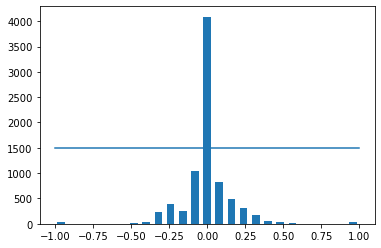

In [6]:
num_bins = 25
samples_per_bin = 1500
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+bins[1:]) * 0.5
plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin,samples_per_bin))

total data 8059
removed 2588
remaining 5471


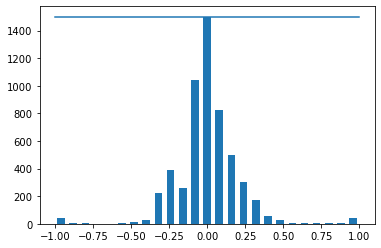

In [7]:
print('total data', len(data))

remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)
    
print('removed', len(remove_list))
data.drop(data.index[remove_list], inplace = True)
print('remaining', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin,samples_per_bin))

In [8]:
print(data.iloc[1])

center      center_2020_07_10_20_10_22_103.jpg
left          left_2020_07_10_20_10_22_103.jpg
right        right_2020_07_10_20_10_22_103.jpg
steering                                     0
throttle                                     0
reverse                                      0
speed                              8.21491e-05
Name: 1, dtype: object


In [9]:
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

In [10]:
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [11]:
X_train,X_valid,y_train,y_valid = train_test_split(image_paths, 
                                                   steerings, test_size = 0.2)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 4376
Valid Samples: 1095


Text(0.5, 1.0, 'validation set')

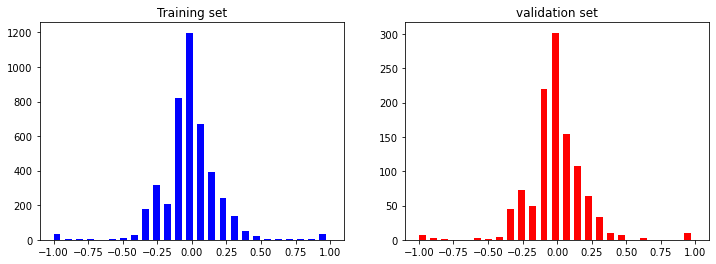

In [12]:
fig,axes = plt.subplots(1,2, figsize = (12,4))
axes[0].hist(y_train , bins=num_bins, width = 0.05, color='blue')
axes[0].set_title("Training set")
axes[1].hist(y_valid , bins=num_bins, width = 0.05, color='red')
axes[1].set_title("validation set")

In [13]:
def zoom(image):
    zoom = iaa.Affine(scale= (1, 1.3))
    image = zoom.augment_image(image)
    return image

Text(0.5, 1.0, 'zoomed img')

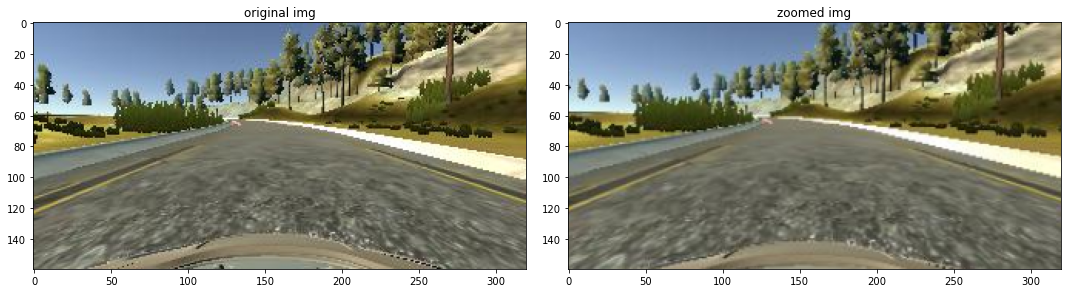

In [14]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('original img')
axes[1].imshow(zoomed_image)
axes[1].set_title('zoomed img')

In [15]:
def pan(image):
    pan = iaa.Affine(translate_percent={"x":(-0.1,0.1), "y":(-0.1,0.1)})
    image = pan.augment_image(image)
    return image

Text(0.5, 1.0, 'pan img')

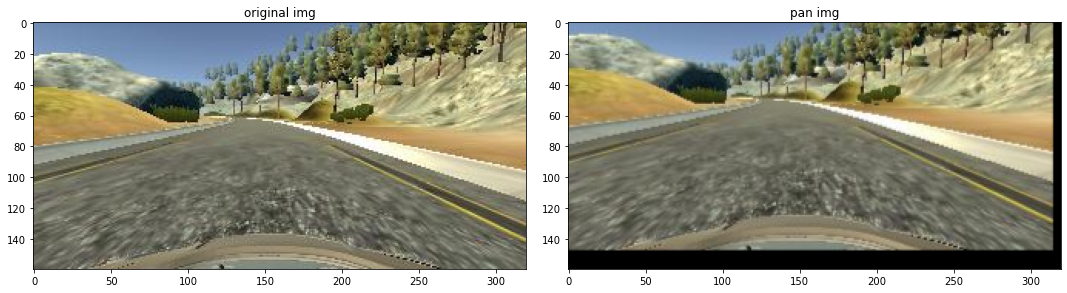

In [16]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('original img')
axes[1].imshow(panned_image)
axes[1].set_title('pan img')

In [17]:
def image_random_brightness(image):
    brightness = iaa.Multiply((0.2,1.2))
    image = brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'brightness_altered_image')

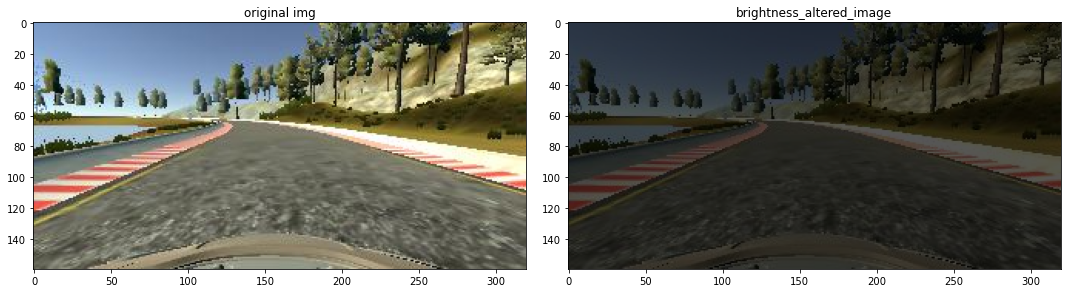

In [18]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
brightness_altered_image = image_random_brightness(original_image)
fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('original img')
axes[1].imshow(brightness_altered_image)
axes[1].set_title('brightness_altered_image')

In [19]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1) # one for horizontal flip
    steering_angle =- steering_angle
    return image,steering_angle

Text(0.5, 1.0, 'flipped img: 0.1098527')

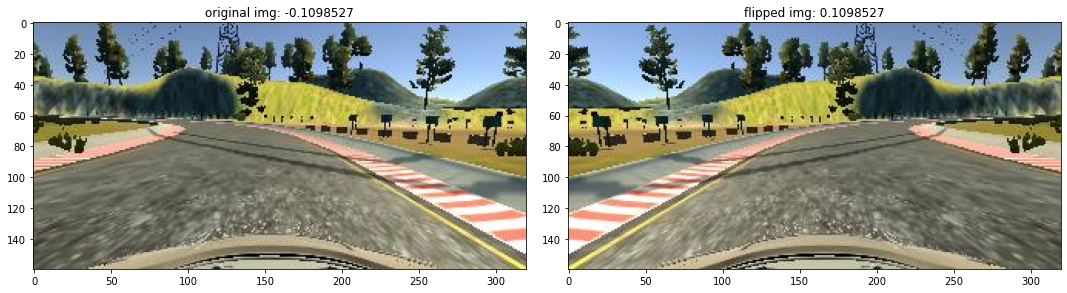

In [20]:
random_index = random.randint(0,1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title('original img: '+ str(steering_angle))

axes[1].imshow(flipped_image)
axes[1].set_title('flipped img: '+ str(flipped_steering_angle))

In [30]:
def img_preprocess(img):
    img = mpimg.imread(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,(3,3), 0)
    img = cv2.resize(img, (200,66))
    img = img/255
    return img

Text(0.5, 1.0, 'preprocessed image')

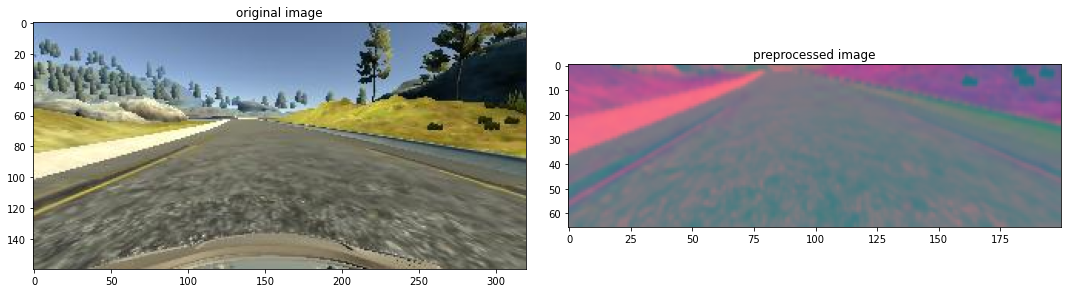

In [32]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axes = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('original image')
axes[1].imshow(preprocessed_image)
axes[1].set_title('preprocessed image')

In [33]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

(4376, 66, 200, 3)


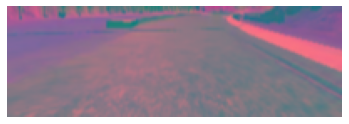

In [37]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [35]:
def nvidia_model():
 
    model = Sequential()
 
    model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='relu'))
 
    model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
    model.add(Dropout(0.45))
 
 
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.4))
 
 
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation ='elu'))
    model.add(Dense(1))
 
 
    optimizer= Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
 
    return model

In [36]:
model = nvidia_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout (Dropout)            (None, 1, 18, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [39]:
model.fit(X_train,y_train, epochs=25, validation_data=(X_valid,y_valid),batch_size=100,verbose=1,shuffle=1)

Epoch 1/25
44/44 [==============================] - 7s 148ms/step - loss: 0.1416 - accuracy: 0.1949 - val_loss: 0.0398 - val_accuracy: 0.2137
Epoch 2/25
44/44 [==============================] - 6s 147ms/step - loss: 0.0421 - accuracy: 0.1995 - val_loss: 0.0367 - val_accuracy: 0.2137
Epoch 3/25
44/44 [==============================] - 7s 154ms/step - loss: 0.0384 - accuracy: 0.1995 - val_loss: 0.0327 - val_accuracy: 0.2137
Epoch 4/25
44/44 [==============================] - 7s 161ms/step - loss: 0.0357 - accuracy: 0.1993 - val_loss: 0.0293 - val_accuracy: 0.2137
Epoch 5/25
44/44 [==============================] - 8s 178ms/step - loss: 0.0320 - accuracy: 0.1995 - val_loss: 0.0272 - val_accuracy: 0.2137
Epoch 6/25
44/44 [==============================] - 7s 166ms/step - loss: 0.0299 - accuracy: 0.1995 - val_loss: 0.0236 - val_accuracy: 0.2137
Epoch 7/25
44/44 [==============================] - 7s 163ms/step - loss: 0.0279 - accuracy: 0.1997 - val_loss: 0.0200 - val_accuracy: 0.2137
Epoch 

In [40]:
loss = pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.141589,0.194927,0.039818,0.213699
1,0.042100,0.199497,0.036721,0.213699
2,0.038425,0.199497,0.032697,0.213699
3,0.035715,0.199269,0.029337,0.213699
4,0.031979,0.199497,0.027170,0.213699


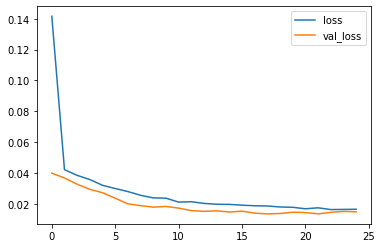

In [41]:
loss[['loss','val_loss']].plot()

In [42]:
model.save('behaviour_cloning/model2.h5')

In [ ]:
import tensorflow
model = tensorflow.keras.models.load_model('behaviour_cloning/model.h5')